In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data1 = pd.read_csv("Data/daten_anonym2/arzta_daten_anonym1.csv", sep=';')
# data2 = pd.read_csv("Data/daten_anonym2/arzta_daten_anonym2.csv", sep=';')
# data3 = pd.read_csv("Data/daten_anonym2/arzta_daten_anonym3.csv", sep=';')
# data4 = pd.read_csv("Data/daten_anonym2/arzta_daten_anonym4.csv", sep=';')

In [3]:
data = data1
#data = pd.concat([data1, data2, data3, data4], axis=0)
data.shape

(1000000, 15)

In [4]:
data.head().T

,0,1,2,3,4
ID,ID_1,ID_2,ID_3,ID_4,ID_5
KORREKTUR,0,0,0,0,0
RECHNUNGSBETRAG,"330,97","455,2","199,53","142,85","168,87"
ALTER,"53,5703841656576","83,3827191198588","69,5675107257784","69,5563285223998","18,8734340341816"
GESCHLECHT,0,1,1,1,0
VERSICHERUNG,1,1,1,1,1
FACHRICHTUNG,1,1,1,1,1
NUMMER,A_178,A_765,A_1978,A_1257,A_737
NUMMER_KAT,AA_10,AA_13,AA_2,AA_3,AA_13
TYP,0,0,0,0,0


In [5]:
columns_comma = ['RECHNUNGSBETRAG', 'FAKTOR', 'BETRAG', 'ALTER', 'KORREKTUR'] 
data[columns_comma] = data[columns_comma].apply(lambda x: x.str.replace(',','.'))
for column in columns_comma:
    data[column] = pd.to_numeric(data[column], downcast='float')
data.dtypes

ID                  object
KORREKTUR          float32
RECHNUNGSBETRAG    float32
ALTER              float32
GESCHLECHT           int64
VERSICHERUNG         int64
FACHRICHTUNG         int64
NUMMER              object
NUMMER_KAT          object
TYP                float64
ANZAHL               int64
FAKTOR             float32
BETRAG             float32
ART                 object
LEISTUNG            object
dtype: object

In [6]:
%%time
## construct target column
target = data.groupby(['ID'])['KORREKTUR'].apply(lambda dt: int(np.sign(dt).values[0])).to_frame(name='target')
data = data.merge(target, on='ID', how='inner')

CPU times: user 47.1 s, sys: 833 ms, total: 48 s
Wall time: 50.7 s


In [7]:
data.describe()

,KORREKTUR,RECHNUNGSBETRAG,ALTER,GESCHLECHT,VERSICHERUNG,FACHRICHTUNG,TYP,ANZAHL,FAKTOR,BETRAG,target
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,908310.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,4.090332,351.656311,64.724052,0.544097,0.993030,0.993030,0.013624,1.084842,1.580567,18.605600,0.028152
std,108.159317,546.377136,16.854935,0.498052,0.083195,0.083195,0.115925,0.725904,0.768939,69.448013,0.165407
min,0.000000,0.820000,0.037582,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-96.519997,0.000000
25%,0.000000,110.440002,59.106241,0.000000,1.000000,1.000000,0.000000,1.000000,1.150000,3.350000,0.000000
50%,0.000000,220.089996,68.261078,1.000000,1.000000,1.000000,0.000000,1.000000,1.160000,10.720000,0.000000
75%,0.000000,423.049988,75.464828,1.000000,1.000000,1.000000,0.000000,1.000000,2.300000,20.110001,0.000000
max,35685.601562,56131.269531,106.495598,1.000000,1.000000,1.000000,1.000000,72.000000,17.000000,47779.269531,1.000000


In [8]:
data_unique = data.drop_duplicates(subset=['ID'])[['ID', 'RECHNUNGSBETRAG', 'ALTER', 'GESCHLECHT', 'VERSICHERUNG', 'KORREKTUR', 'target']].reset_index(drop=True)

In [9]:
data_unique.describe()

,RECHNUNGSBETRAG,ALTER,GESCHLECHT,VERSICHERUNG,KORREKTUR,target
count,301453.000000,301453.000000,301453.000000,301453.000000,301453.000000,301453.000000
mean,224.831253,63.445705,0.524274,0.993130,2.192280,0.017515
std,428.697632,18.134970,0.499411,0.082601,83.267258,0.131181
min,0.820000,0.037582,0.000000,0.000000,0.000000,0.000000
25%,61.860001,57.646496,0.000000,1.000000,0.000000,0.000000
50%,128.690002,67.681053,1.000000,1.000000,0.000000,0.000000
75%,263.220001,75.147118,1.000000,1.000000,0.000000,0.000000
max,56131.269531,106.495598,1.000000,1.000000,35685.601562,1.000000


### ID

In [10]:
data.ID.unique().shape[0]

301453

In [11]:
# percent of unique clients
data.ID.unique().shape[0] / data.ID.shape[0] * 100

30.145300000000002

In [12]:
sum(data.groupby(['ID'])['target'].sum() > 0)

5280

In [13]:
sum(data.groupby(['ID'])['target'].sum() > 0) / data.ID.unique().shape[0] * 100

1.7515168202008273

### KORREKTUR

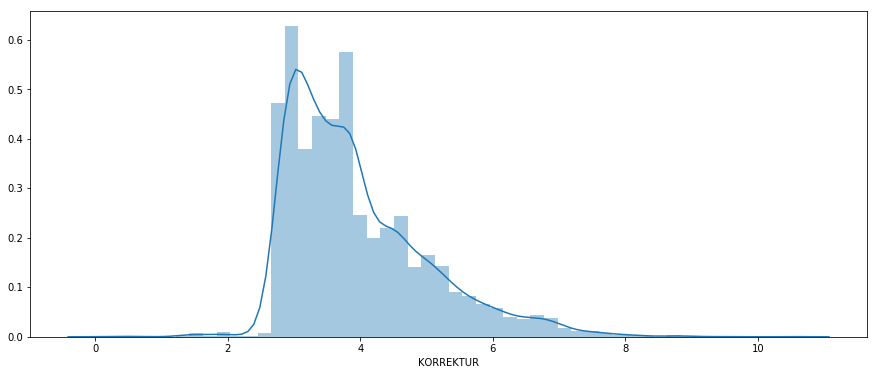

In [14]:
plt.figure(figsize=(15, 6))
sns.distplot(np.log(data_unique[data_unique.target == 1].KORREKTUR + 1))
#plt.title('Logarithm of Korrektur', fontsize=20)
plt.savefig('Korrektur.png', dpi=150)

In [15]:
data.corr()

,KORREKTUR,RECHNUNGSBETRAG,ALTER,GESCHLECHT,VERSICHERUNG,FACHRICHTUNG,TYP,ANZAHL,FAKTOR,BETRAG,target
KORREKTUR,1.000000,0.329824,-0.003150,0.001493,0.000236,0.000236,0.020563,0.019705,0.002039,0.115923,0.222198
RECHNUNGSBETRAG,0.329824,1.000000,0.056405,0.035904,-0.007520,-0.007520,0.074207,0.039498,-0.016741,0.198721,0.186389
ALTER,-0.003150,0.056405,1.000000,0.085930,-0.002547,-0.002547,0.019184,-0.014704,-0.036826,-0.002911,0.002968
GESCHLECHT,0.001493,0.035904,0.085930,1.000000,0.038020,0.038020,-0.000498,-0.004526,-0.022581,0.003082,-0.003343
VERSICHERUNG,0.000236,-0.007520,-0.002547,0.038020,1.000000,1.000000,-0.000601,-0.002130,-0.000164,0.000182,-0.003399
FACHRICHTUNG,0.000236,-0.007520,-0.002547,0.038020,1.000000,1.000000,-0.000601,-0.002130,-0.000164,0.000182,-0.003399
TYP,0.020563,0.074207,0.019184,-0.000498,-0.000601,-0.000601,1.000000,-0.004703,0.064705,0.106552,0.030340
ANZAHL,0.019705,0.039498,-0.014704,-0.004526,-0.002130,-0.002130,-0.004703,1.000000,0.063693,0.198402,0.008308
FAKTOR,0.002039,-0.016741,-0.036826,-0.022581,-0.000164,-0.000164,0.064705,0.063693,1.000000,0.121920,0.005428
BETRAG,0.115923,0.198721,-0.002911,0.003082,0.000182,0.000182,0.106552,0.198402,0.121920,1.000000,0.032941


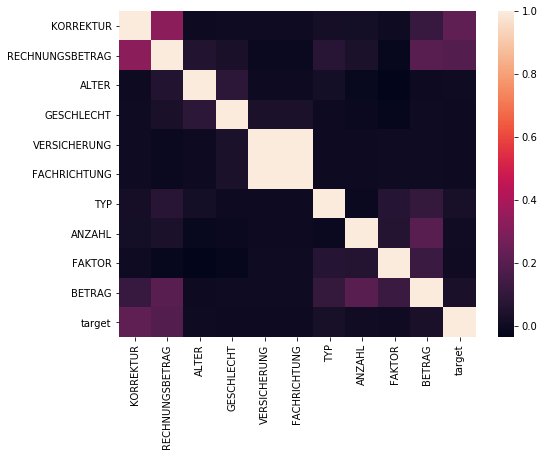

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr())

### RECHNUNGSBETRAG: INVOICE AMOUNT: Invoice amount per document


In [17]:
data_unique.RECHNUNGSBETRAG.value_counts().head()

21.440001    2492
10.720000    1933
48.259998    1200
37.529999    1158
3.150000     1091
Name: RECHNUNGSBETRAG, dtype: int64

In [18]:
data_unique.RECHNUNGSBETRAG.min()

0.82

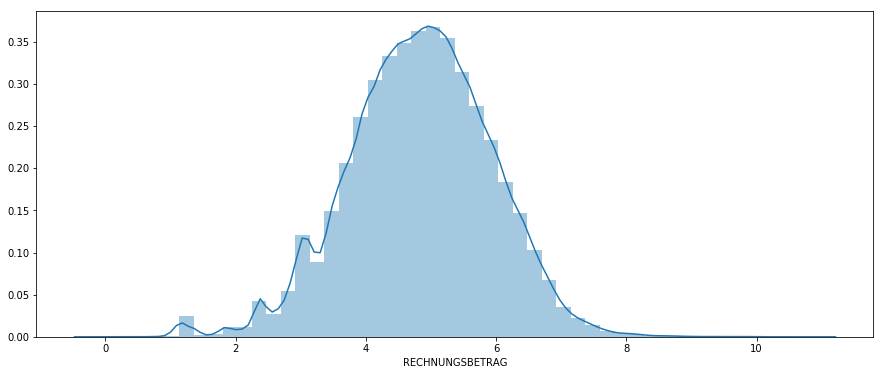

In [19]:
plt.figure(figsize=(15, 6))
sns.distplot(np.log(data_unique.RECHNUNGSBETRAG)) 
plt.savefig('rechnungsbetrag.png', dpi=150)

### ALTER: AGE: age of the customer

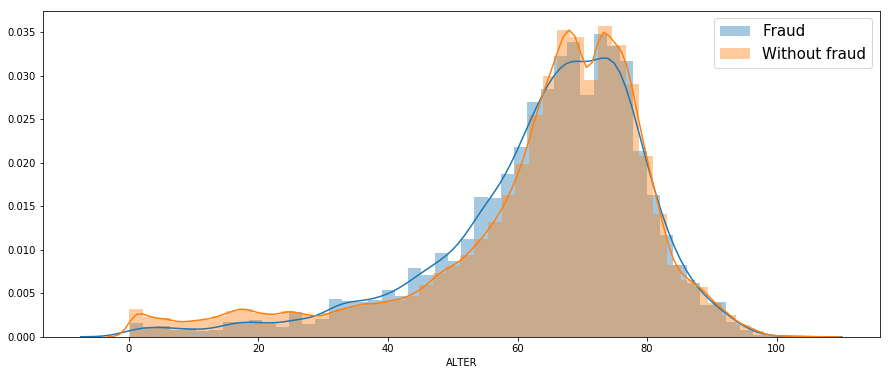

In [20]:
plt.figure(figsize=(15, 6))
sns.distplot(data_unique[data_unique.target==1].ALTER, label = 'Fraud')
sns.distplot(data_unique[data_unique.target==0].ALTER, label = 'Without fraud')
plt.legend(fontsize=15)
plt.savefig("alter.png", dpi=150)

###  GESCHLECHT: SEX: gender of the customer (0/1-coded)


In [21]:
data_unique.GESCHLECHT.value_counts() / data_unique.GESCHLECHT.value_counts().sum()

1    0.524274
0    0.475726
Name: GESCHLECHT, dtype: float64

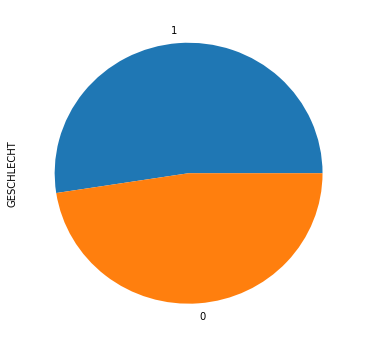

In [22]:
data_unique.GESCHLECHT.value_counts().plot.pie(figsize=(6, 6))

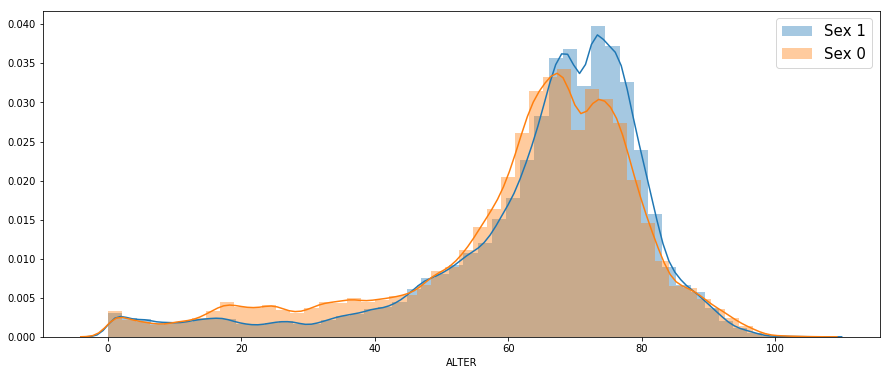

In [23]:
plt.figure(figsize=(15, 6))
sns.distplot(data_unique[data_unique.GESCHLECHT==1].ALTER, label = 'Sex 1')
sns.distplot(data_unique[data_unique.GESCHLECHT==0].ALTER, label = 'Sex 0')
plt.legend(fontsize=15)
plt.savefig("alter.png", dpi=150)

### VERSICHERUNG: INSURANCE: type of insurance of the customer - full or supplementary insurance (0/1-coded)


In [24]:
data.VERSICHERUNG.value_counts() / data.VERSICHERUNG.value_counts().sum()

1    0.99303
0    0.00697
Name: VERSICHERUNG, dtype: float64

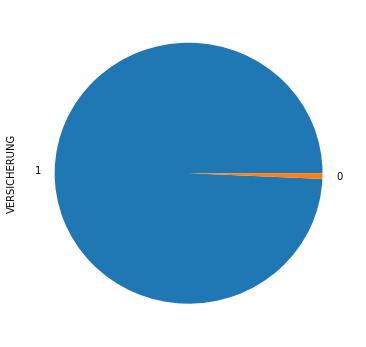

In [25]:
data.VERSICHERUNG.value_counts().plot.pie(figsize=(6, 6));

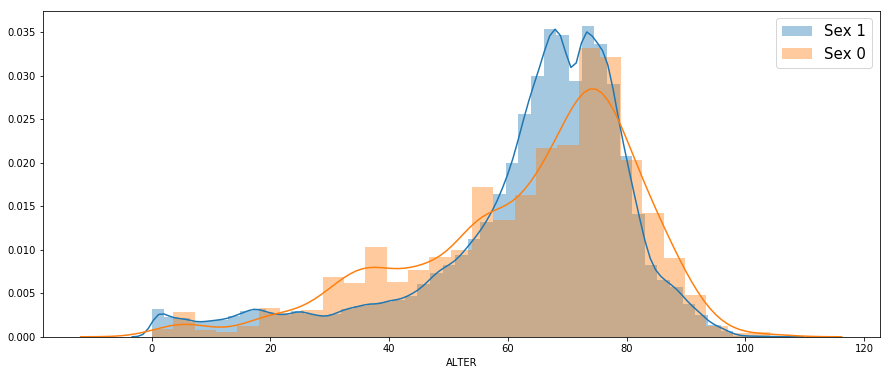

In [26]:
plt.figure(figsize=(15, 6))
sns.distplot(data_unique[data_unique.VERSICHERUNG==1].ALTER, label = 'Sex 1')
sns.distplot(data_unique[data_unique.VERSICHERUNG==0].ALTER, label = 'Sex 0')
plt.legend(fontsize=15)
plt.savefig("alter.png", dpi=150)

###  FACHRICHTUNG: FOCUS: Doctor's specialty: general practitioner, dermatologist, ophthalmologist, etc. (mapped to anonymous values) per document


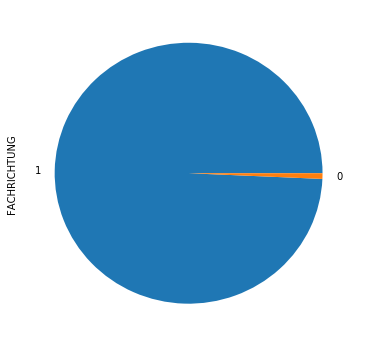

In [27]:
# === VERSICHERUNG !!!

data.FACHRICHTUNG.value_counts().plot.pie(figsize=(6, 6));

###  NUMMER: NUMBER: Fee number describing the treatment (mapped to anonymous values) per line


In [28]:
data.NUMMER.head()

0     A_178
1     A_765
2     A_764
3    A_1257
4     A_777
Name: NUMMER, dtype: object

In [29]:
data.NUMMER.unique().shape[0]

1940

###  NUMMER_KAT: NUMBER_KAT: Upper category of the fee number (mapped to anonymous values) per line


In [30]:
data.NUMMER_KAT.head()

0    AA_10
1    AA_13
2    AA_13
3     AA_3
4    AA_13
Name: NUMMER_KAT, dtype: object

In [31]:
data.NUMMER_KAT.unique().shape[0]

17

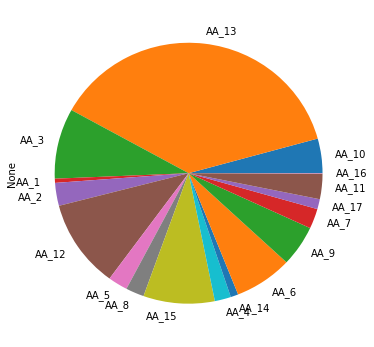

In [32]:
## number of treatments per kategory

kategories = data.NUMMER_KAT.unique()
kategory_number = []
for kategory in kategories:
    kategory_number.append(data[data.NUMMER_KAT == kategory].NUMMER.unique().shape[0])
    
pd.Series(index=kategories, data=kategory_number).plot.pie(figsize=(6, 6));

### TYP: TYPE: Special type of billing ("analogue calculation", 0/1-coded) per line

In [33]:
data.TYP.value_counts(dropna=False) / data.TYP.value_counts(dropna=False).sum() * 100

 0.0    89.5935
NaN      9.1690
 1.0     1.2375
Name: TYP, dtype: float64

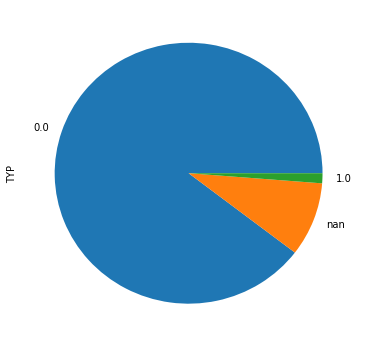

In [34]:
data.TYP.value_counts(dropna=False).plot.pie(figsize=(6, 6));

### ANZAHL: NUMBER: number of treatments per line


In [35]:
data.ANZAHL.value_counts(dropna=False)

1     962250
2      19089
3      12543
4       2225
5        930
6        639
8        589
10       275
7        230
16       228
20       216
9        163
12       142
11        78
15        72
13        63
14        47
30        42
18        34
17        28
19        24
22        13
24        11
40        11
32         6
23         5
36         4
25         4
26         4
27         3
28         3
29         3
38         3
48         3
33         3
34         3
50         2
31         2
21         2
60         1
56         1
61         1
35         1
46         1
42         1
39         1
72         1
Name: ANZAHL, dtype: int64

### FAKTOR: FACTOR: increase factor of treatment per line


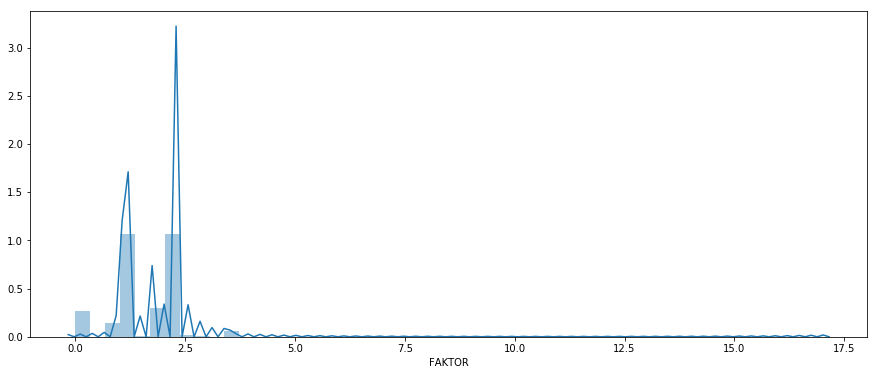

In [36]:
plt.figure(figsize=(15, 6))
sns.distplot(data.FAKTOR)

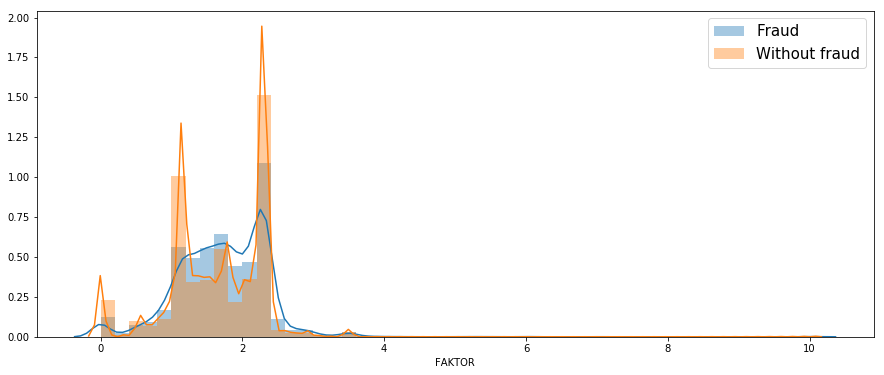

In [37]:
plt.figure(figsize=(15, 6))
sns.distplot(data[data.target==1].groupby(['ID'])['FAKTOR'].mean(), label='Fraud')
sns.distplot(data[data.target==0].groupby(['ID'])['FAKTOR'].mean(), label='Without fraud')
plt.legend(fontsize=15)

### BETRAG: AMOUNT: Cost of treatment per line


In [38]:
min(data.BETRAG / data.ANZAHL)

-16.086666107177734

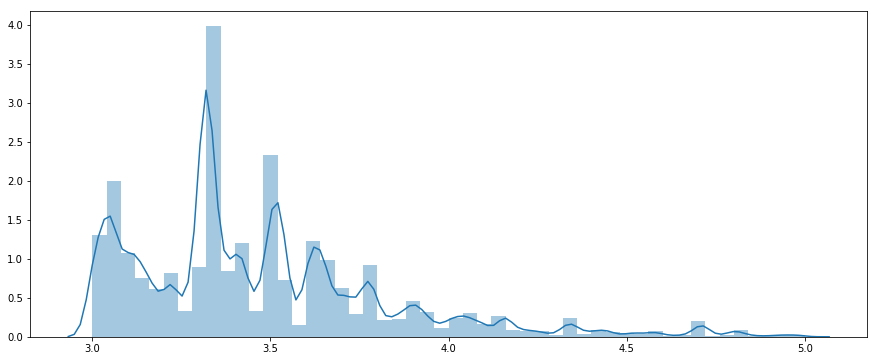

In [39]:
plt.figure(figsize=(15, 6))
vals = np.log(data.BETRAG / data.ANZAHL + 17)
vals = vals.iloc[np.where(vals >3)]
vals = vals.iloc[np.where(vals <5)]
sns.distplot(vals);
plt.savefig('betrag.png', dpi=150)

### ART: TYPE: Material cost type (mapped to anonymous values) per line


In [40]:
data.ART.value_counts(dropna=False)

NaN     908310
B_2      74393
B_3      14253
B_13      1816
B_1        998
B_9        135
B_6         59
B_14        33
B_11         1
B_8          1
B_4          1
Name: ART, dtype: int64

### LEISTUNG: PERFORMANCE: Type of benefits (grouping of treatments into collectively agreed types of benefits, mapped to anonymous values) per line


In [ ]:
data.LEISTUNG.value_counts(dropna=False)